CLASIFICACIÓN BINARIA (calculos renales, score crediticio)
INDICE
    
    EXPLORACIÓN
    PROCESAMIENTOS Y FEATURE ENGINEERING
    MODELOS, ENSAMBES Y SUS PARAMETROS
    AJUSTES POST ENTRENAMIENTO
    EVALUACIÓN Y METRICAS
    PROBLEMAS COMUNES

In [4]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#CONFIGURATION
pd.set_option('display.max_columns', None)

GENERACIÓN DEL DATASET

In [5]:
sample=1000
X, y = make_classification(n_features=10, n_informative=3, n_redundant=0, n_classes=2, n_clusters_per_class=1, n_samples=sample)



# Crea una lista con los valores permitidos
valores = ['verde', 'rojo', 'gris', 'azul']
lista_aleatoria_1 = []
# Genera 1000 valores aleatorios y los agrega a la lista
for i in range(sample):
    lista_aleatoria_1.append(random.choice(valores))
    
# Crea una lista con los valores permitidos
valores = ['toro', 'vaca', 'camello', 'perro','gato']
lista_aleatoria_2 = []
# Genera 1000 valores aleatorios y los agrega a la lista
for i in range(sample):
    lista_aleatoria_2.append(random.choice(valores))
    
df = pd.DataFrame(X, columns=['Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5', 'Variable 6', 'Variable 7', 'Variable 8', 'Variable 9', 'Variable 10'])

# Agrega una columna con la variable objetivo
df['Variable 11']=lista_aleatoria_1
df['Variable 11']=df['Variable 11'].replace('verde', 'rojo')
df['Variable 12']=lista_aleatoria_2
df['Objetivo'] = y


# Generación de variables con distribuciones
from scipy import stats
data = stats.gamma.rvs(2, loc=1.5, scale=2, size=10000)

# Generación de una lista de numeros
numeros = np.arange(0,101,2)
valores_random = np.random.randint(1,101,100)
valores_normal =np.random.normal(50,10,100)
valores_unif=np.random.uniform(50,10,100)

## EXPLORACIÓN


INDICE

Descripción gral: duplicados, nulos,etc. jugar con tabla pivot

Analisis variables continuas (cuantitativas): histogramas, max, min, media, desvio, distribuciones?, percentiles, outliers, nulos
        graficos: boxplot

Analisis variables discretas (temporales, cualitativas): distribución, moda, outliers, nulos
        graficos: torta

Analisis relacion entre variables:
    continuas/discretas(temporales): graficos de barras (agregaciones de variable/s continua/s por una discreta), pareto
    continuas/continuas: matriz de dispersión (entre todas las variables. si es ella misma es un histograma), heatmap correlación
    discretas/discretas: 


Descripción gral

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Variable 1   1000 non-null   float64
 1   Variable 2   1000 non-null   float64
 2   Variable 3   1000 non-null   float64
 3   Variable 4   1000 non-null   float64
 4   Variable 5   1000 non-null   float64
 5   Variable 6   1000 non-null   float64
 6   Variable 7   1000 non-null   float64
 7   Variable 8   1000 non-null   float64
 8   Variable 9   1000 non-null   float64
 9   Variable 10  1000 non-null   float64
 10  Variable 11  1000 non-null   object 
 11  Variable 12  1000 non-null   object 
 12  Objetivo     1000 non-null   int32  
dtypes: float64(10), int32(1), object(2)
memory usage: 97.8+ KB


In [7]:
df.describe()

,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,Variable 10,Objetivo
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,-0.956713,-0.976981,0.021139,-0.027171,0.005717,0.044693,-0.030357,0.016090,-0.037905,-0.078714,0.50000
std,0.749430,1.155779,0.969848,1.415150,0.992541,1.006784,0.999499,0.998088,0.992622,0.989470,0.50025
min,-3.529786,-4.884609,-3.449207,-4.166480,-2.718478,-4.806354,-3.346213,-3.266523,-3.759956,-3.405466,0.00000
25%,-1.428599,-1.747661,-0.618614,-1.036024,-0.657880,-0.650170,-0.700370,-0.699769,-0.718077,-0.770348,0.00000
50%,-0.970214,-1.010282,0.020065,-0.087464,0.042130,0.056384,-0.015272,0.047537,-0.051743,-0.087009,0.50000
75%,-0.507203,-0.213953,0.691469,0.983690,0.642848,0.740216,0.612616,0.700066,0.642017,0.554114,1.00000
max,2.065040,3.318284,3.171019,4.933326,3.331033,3.788296,2.868427,3.328106,3.056680,2.797689,1.00000


In [8]:
#qty valores unicos por columna
df.nunique()

Variable 1     1000
Variable 2     1000
Variable 3     1000
Variable 4     1000
Variable 5     1000
Variable 6     1000
Variable 7     1000
Variable 8     1000
Variable 9     1000
Variable 10    1000
Variable 11       3
Variable 12       5
Objetivo          2
dtype: int64

In [9]:
#qty valores nulos por columna
df.isna().sum().sort_values()

Variable 1     0
Variable 2     0
Variable 3     0
Variable 4     0
Variable 5     0
Variable 6     0
Variable 7     0
Variable 8     0
Variable 9     0
Variable 10    0
Variable 11    0
Variable 12    0
Objetivo       0
dtype: int64

In [10]:
#qty valores duplicados por columna
df.duplicated().sum()

0

In [11]:
#Tablas pivots o group by 
# df[['label','feature1']].groupby('label').count().sort_values('feature1',ascending=False)
# df.pivot_table(index=['Year', 'Semana', 'Site'], values=['GB', 'Fee'], aggfunc=np.sum).reset_index().sort_values(by='GB', ascending=True) # si agrego .reset_index me vuelve a la base plana!


# df.loc[(df['porcentaje_acuerdo'] == 0)& (df['monto_indemnizacion'] > 0)].count()


# np.where(dftops['organizador'] == "nul. ", "Other", dftops['organizador'])

Analisis variables continuas

In [48]:
# Se parece a alguna distribución?

from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(df['Variable 1'], distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)


Fitting 9 distributions: 100%|██████████| 9/9 [00:01<00:00,  7.35it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.001959,977.928881,-154431.154945,inf,0.005445,9.266199e-01
gamma,0.001959,977.936802,-154431.134275,inf,0.005450,9.261220e-01
beta,0.001965,985.127271,-154388.752502,inf,0.004699,9.793097e-01
exponpow,0.045355,1356.705624,-123008.095558,inf,0.059157,7.317464e-31
logistic,0.051734,1200.415826,-121701.344372,inf,0.086820,4.961144e-66
cauchy,0.064810,911.484033,-119447.896261,inf,0.143281,1.329346e-179
norm,0.068885,1568.568784,-118838.128189,inf,0.096999,2.396643e-82
expon,0.125870,838.285425,-112810.038298,inf,0.138051,1.044459e-166
powerlaw,0.301791,669.993808,-104055.970297,inf,0.316810,0.000000e+00


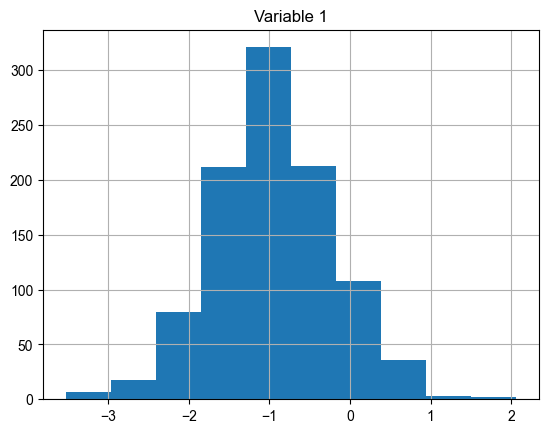

In [13]:
df.hist(column='Variable 1' ,grid=True)
sns.set_style("whitegrid")

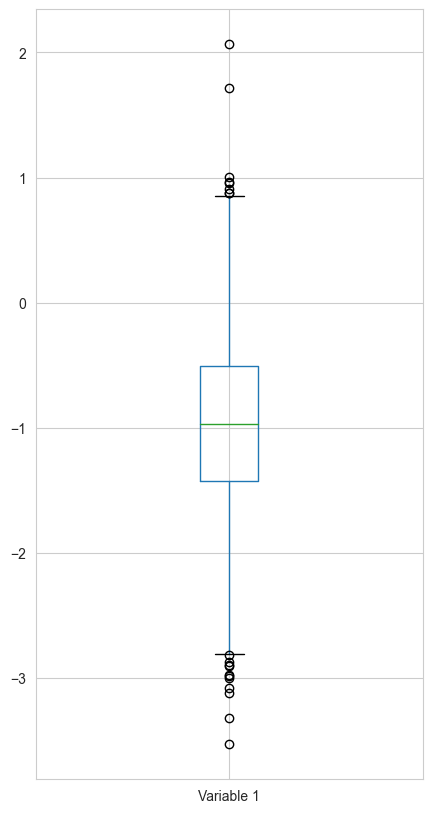

In [15]:
boxplot = df.boxplot(column=['Variable 1'],figsize=(5,10)) 


variables discretas (temporales, cualitativas): distribución, moda, outliers, nulos
graficos: torta
         

<AxesSubplot: ylabel='Variable 12'>

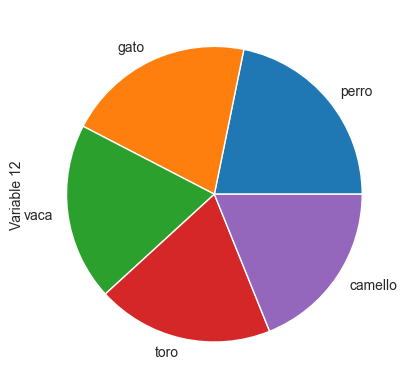

In [28]:
df['Variable 12'].value_counts().plot.pie()

   # relacion entre variables:
            continuas/discretas(temporales): graficos de barras (agregaciones de variable/s continua/s por una discreta), pareto
            continuas/continuas: matriz de dispersión e(ntre todas las variables. si es ella misma es un histograma)
            discretas/discretas: ?

<BarContainer object of 1000 artists>

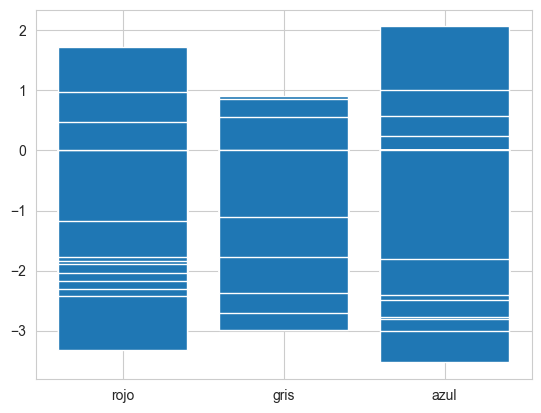

In [17]:
from matplotlib import pyplot 
pyplot.bar(df['Variable 11'],df['Variable 1']) 
# pyplot.show()

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


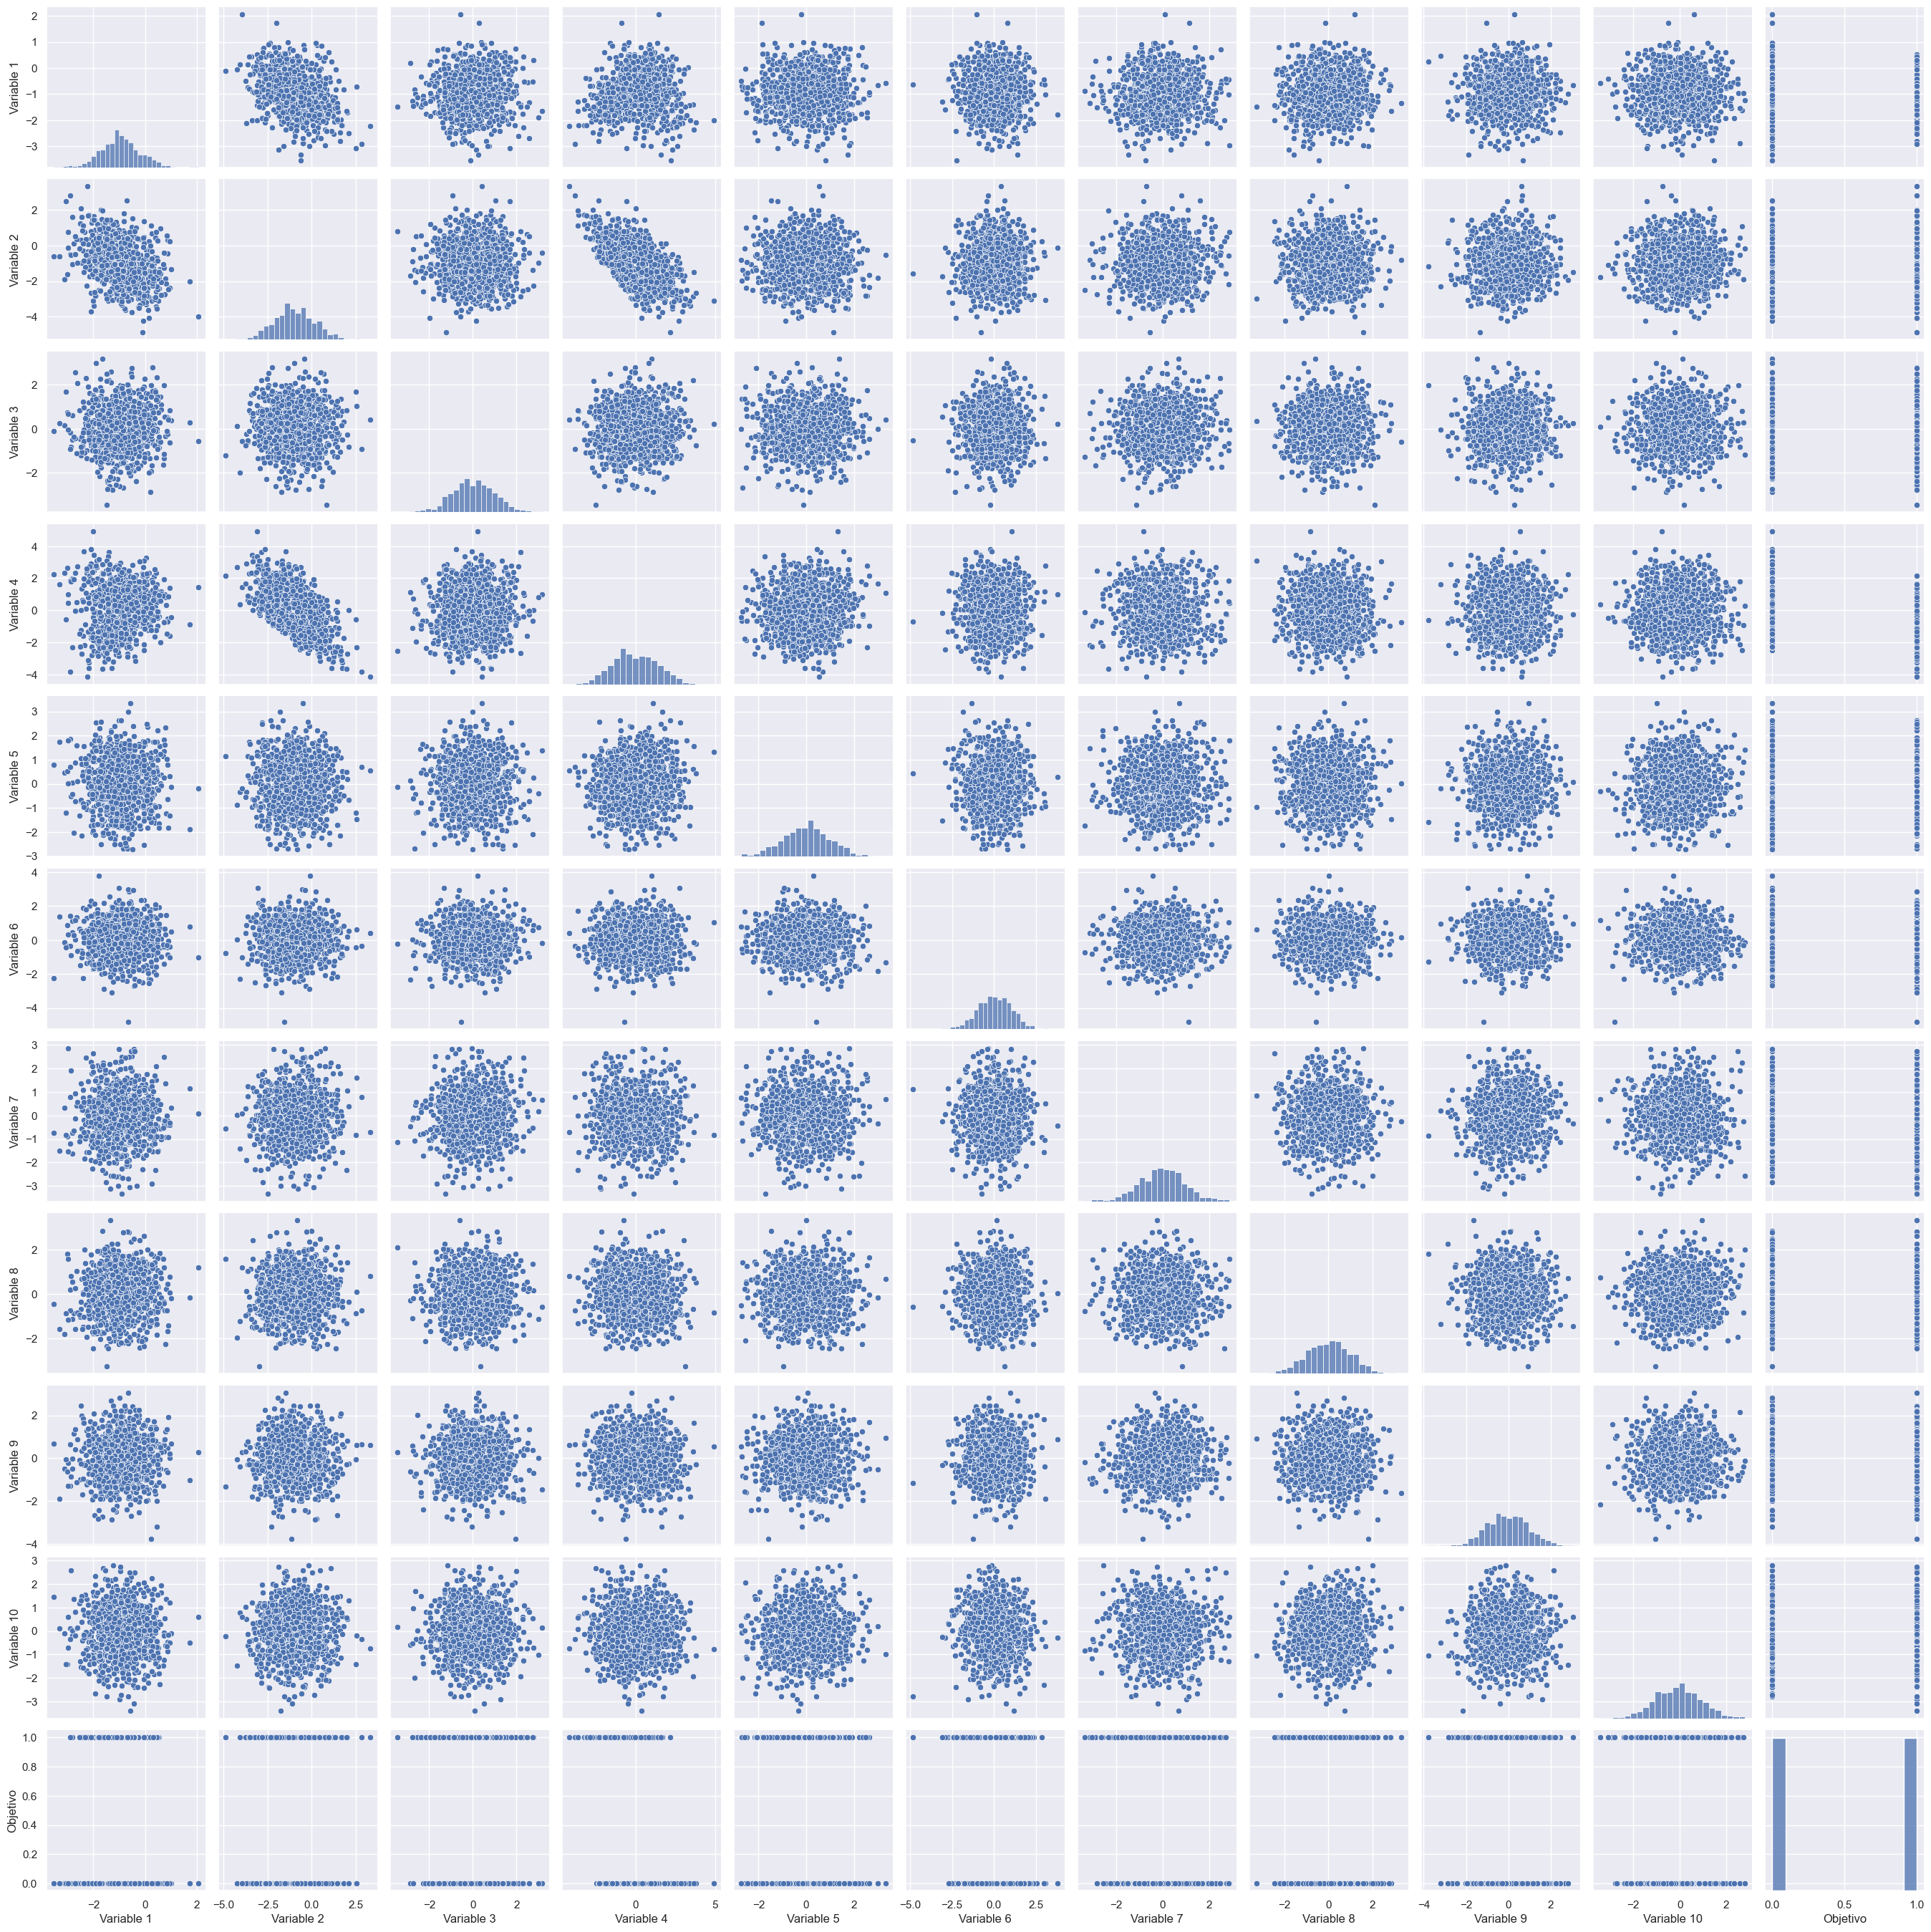

In [29]:
#Diagrama de dispersión
sns.set()
sns.pairplot(df[df.columns], size = 2.5)
plt.show();

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4628\2634608258.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


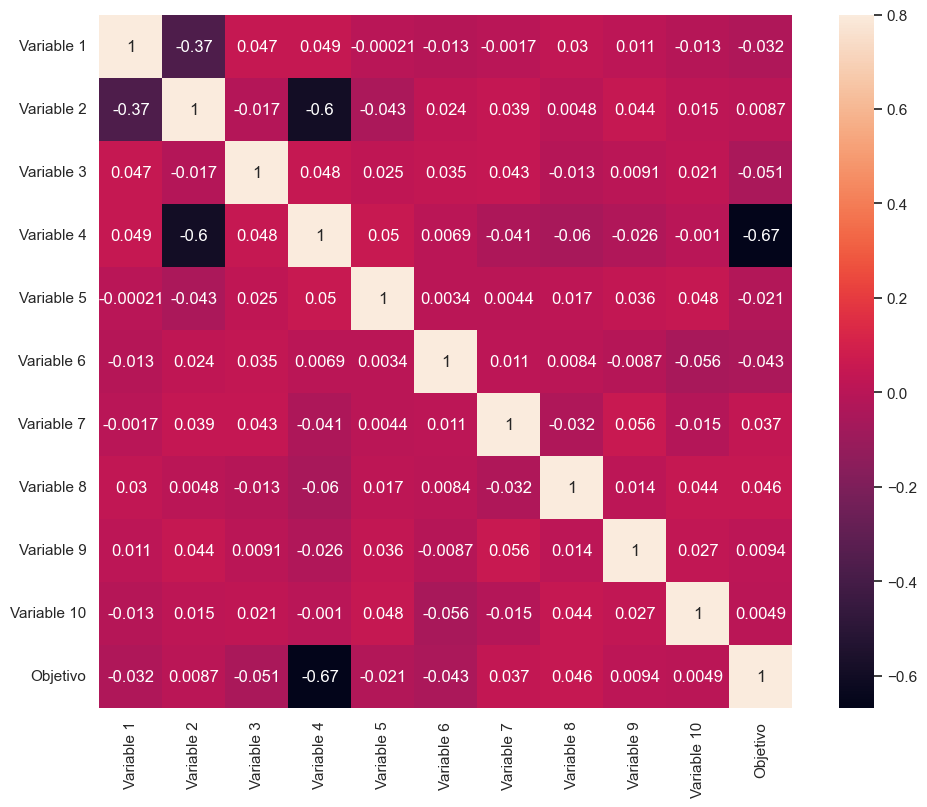

In [30]:
# Matriz de correlación:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cbar = True, annot = True);

PROCESAMIENTOS Y FEATURE ENGINEERING: 

Etiquetado automático de tareas zero-shot
Generación de datos por desbalanceo o pocos datos: sinteticos, duplicados, etc.   SMOTE: generación datos sinteteicos
Generación de medias moviles para ruidos temporales
Eliminación de filas por duplicados, desbalanceo
Generación de variables u eliminación de variables por correlación 
split train test estratificado, 
Reducción de dimensionalidad (Algorithsms: PCA, SVD, LDA)
imputación/reemplazos(map)/eliminación null u outliers, 
cuantificar cualitativas, 
normalizar cuantitativas

In [74]:
# Calcular la media móvil de 2 períodos
df['Variable 15']=df['Variable 10'].rolling(window=2, center=False).mean()


data["Sex"] = [1 if x=="male" else 0 for x in data["Sex"]]


In [ ]:
#Formas de reemplazar/imputar
# df['estado_contrato']=np.where(df['estado_contrato']=="ACTIVO", 1, 0)
.fillna(0)

#Formas de eiminar


MODELOS, ENSAMBES Y SUS PARAMETROS: arboles de decisión (RandomForestClassifier, ExtraTreesClassifier, XGBClassifier, gradientboosting, ), redes (regr log, losso, rasso, MLPClassifier), SVC, naive bayes, k-NN (KNeighborsClassifier,KNeighborsClassifier)


OPTIMIZADOR DE PARAMETROS: gridsearch o RandomizedSearchCV

AJUSTES POST ENTRENAMIENTO:  feature importance,  curva ROC (Receiver Operating Characteristic) para selección de corte de umbral,


    # EVALUACIÓN Y METRICAS: Curva de aprendizaje, AUC para selección de modelo, confusión matrix para ver: F1-score , recall y accuracy. Curva de aprendizaje, , k-folding(metodo de cross-validation. k=10 es buena): permite verificar si hay overfitting si tienen mucha varianza


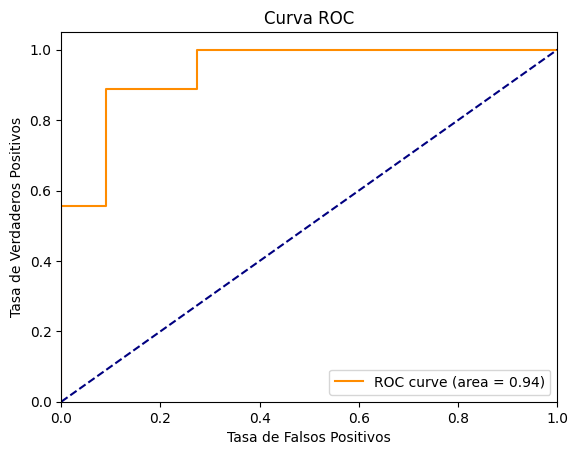

In [2]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Supongamos que tenemos un conjunto de datos de entrenamiento (X_train, y_train) y un conjunto de datos de prueba (X_test, y_test)
# y un modelo de clasificación entrenado (clf)

# Obtenemos las probabilidades de clase positiva para cada ejemplo en el conjunto de prueba
y_scores = clf.predict_proba(X_test)[:, 1]

# Obtenemos las tasas de verdaderos positivos y falsos positivos para diferentes puntos de corte
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculamos el AUC
roc_auc = auc(fpr, tpr)

# Graficamos la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()